# IMDB Movie Analaysis 

This is a dataset of the movies and their budget,revenue,gender,rating and reviwes from the imdb. From the given dataset i would like to ask some questions, so that it would be helpful in connecting people with their type of movie, so that the movie business can be imporved.

## QUESTIONS
* Highest and lowerst Number of movies released in which year ?
* Which genre movie has the Highest voting average ?
* Which genre movies getting the Highest revenue ?
* Which genre movies mostly liked by the people ?
* Does the popularity of the movies depends on the runtime of the movie?
* Does the movie with higher budget yields high revenue?
* How many number of movies have been release each year in each genre?
* Which heros has made the most contribution in movies in terms of revenue?
* Which director has made the most contribution in movies in terms of revenue?

In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import itertools
%matplotlib inline 
movies= pd.read_csv("tmdb-movies.csv")
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,137999939.280026,1.392446e+09,NaN,NaN,NaN,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,5/13/15,6185,7.1,2015,137999939.280026,3.481613e+08,NaN,NaN,NaN,NaN


# Assessing & Cleaning the Data

In [82]:
movies.shape

(10866, 25)

In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8040 non-null object
keywords                9374 non-null object
overview                10860 non-null object
runtime                 10866 non-null object
genres                  10843 non-null object
production_companies    9845 non-null object
release_date            10858 non-null object
vote_count              10866 non-null object
vote_average            10865 non-null object
release_year            10866 non-null object
budget_adj             

In [84]:
#Removing the column which are not required for analysis
movies.drop(['tagline','keywords','overview','budget_adj','revenue_adj','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24'],axis=1, inplace=True) 
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [85]:
#converting the column with interger or float from string object datatype to float
movies.runtime = pd.to_numeric(movies.runtime,errors= 'coerce')
movies.vote_count = pd.to_numeric(movies.vote_count,errors='coerce')
movies.vote_average = pd.to_numeric(movies.vote_average,errors='coerce')
movies.budget = movies.budget.astype(float)
movies.revenue = movies.revenue.astype(float)

In [86]:
#creating gener and lead_role column for analysis & replaceing the genres string values seperated with comma.
movies['genre'] = movies.genres.str.split('|',expand= True)[0]
movies['lead_role'] = movies.cast.str.split('|',expand=True)[0]
movies['genres'] = movies['genres'].str.replace('|',',')
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre,lead_role
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124.0,"Action,Adventure,Science Fiction,Thriller",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015,Action,Chris Pratt
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120.0,"Action,Adventure,Science Fiction,Thriller",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015,Action,Tom Hardy


In [87]:
#To remove the duplicates
movies.drop_duplicates(inplace=True)

In [88]:
#convert all the budget and revenue amount in Billion Dollar Amount
movies.budget = movies.budget/1000000000 
movies.revenue = movies.revenue/1000000000 
movies.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre,lead_role
0,135397,tt0369610,32.985763,0.15,1.513529,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124.0,"Action,Adventure,Science Fiction,Thriller",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015,Action,Chris Pratt
1,76341,tt1392190,28.419936,0.15,0.378436,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120.0,"Action,Adventure,Science Fiction,Thriller",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015,Action,Tom Hardy
2,262500,tt2908446,13.112507,0.11,0.295238,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119.0,"Adventure,Science Fiction,Thriller",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015,Adventure,Shailene Woodley
3,140607,tt2488496,11.173104,0.20,2.068178,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136.0,"Action,Adventure,Science Fiction,Fantasy",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015,Action,Harrison Ford


In [89]:
#Renaming the buget and revenue column in billions
movies = movies.rename(columns={'budget':'budget_in_billion','revenue':'revenue_in_billion'})

In [90]:
#filtering the release_year and genre to required length for better analysis
movies.release_year = movies.release_year.astype(str)
movies = movies[movies['release_year'].str.len() == 4]
movies = movies[movies['genre'].str.len() <= 15]
movies.release_year = movies.release_year.astype(int)

# Explorations Phase

In [91]:
#Release years and count from the data
print("Total Number of Release Years:", movies.release_year.nunique())
print("Release Years:", movies.release_year.unique())

Total Number of Release Years: 56
Release Years: [2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997 2013
 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981 1996 2000
 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971 1990 1961 1960
 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


In [92]:
# Basic analysis from the Data
print ("Total number of movies:",movies.original_title.nunique())
print ("Total number of Geners:",movies.genre.nunique())
print ("Different Geners:",movies['genre'].unique())
print ("Total number of directors:",movies['director'].nunique())

Total number of movies: 10508
Total number of Geners: 20
Different Geners: ['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family' 'Comedy'
 'Crime' 'Romance' 'War' 'Mystery' 'Thriller' 'Fantasy' 'History'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' 'Foreign']
Total number of directors: 5039


In [93]:
#to display the statistical values of all numerical data's
movies.describe()

,id,popularity,budget_in_billion,revenue_in_billion,runtime,vote_count,vote_average,release_year
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,65864.003796,0.648130,0.014672,0.039923,102.139061,218.009444,5.974058,2001.312656
std,91963.444634,1.002536,0.030972,0.117259,31.290158,576.976996,0.933689,12.814955
min,5.000000,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000
25%,10590.000000,0.208372,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000
50%,20558.000000,0.384557,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000
75%,75190.000000,0.715451,0.015000,0.024007,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,0.425000,2.781506,900.000000,9767.000000,9.200000,2015.000000


## **Highest and lowerst Number of movies released in which year ?** <br>
In this analysis i have used the "Release_year" variable to identify the number of movies released each year, So from the Bar graph analysis it has been clear that most number of movies released on the year **2014** and the least number of movies was released on **1961**.


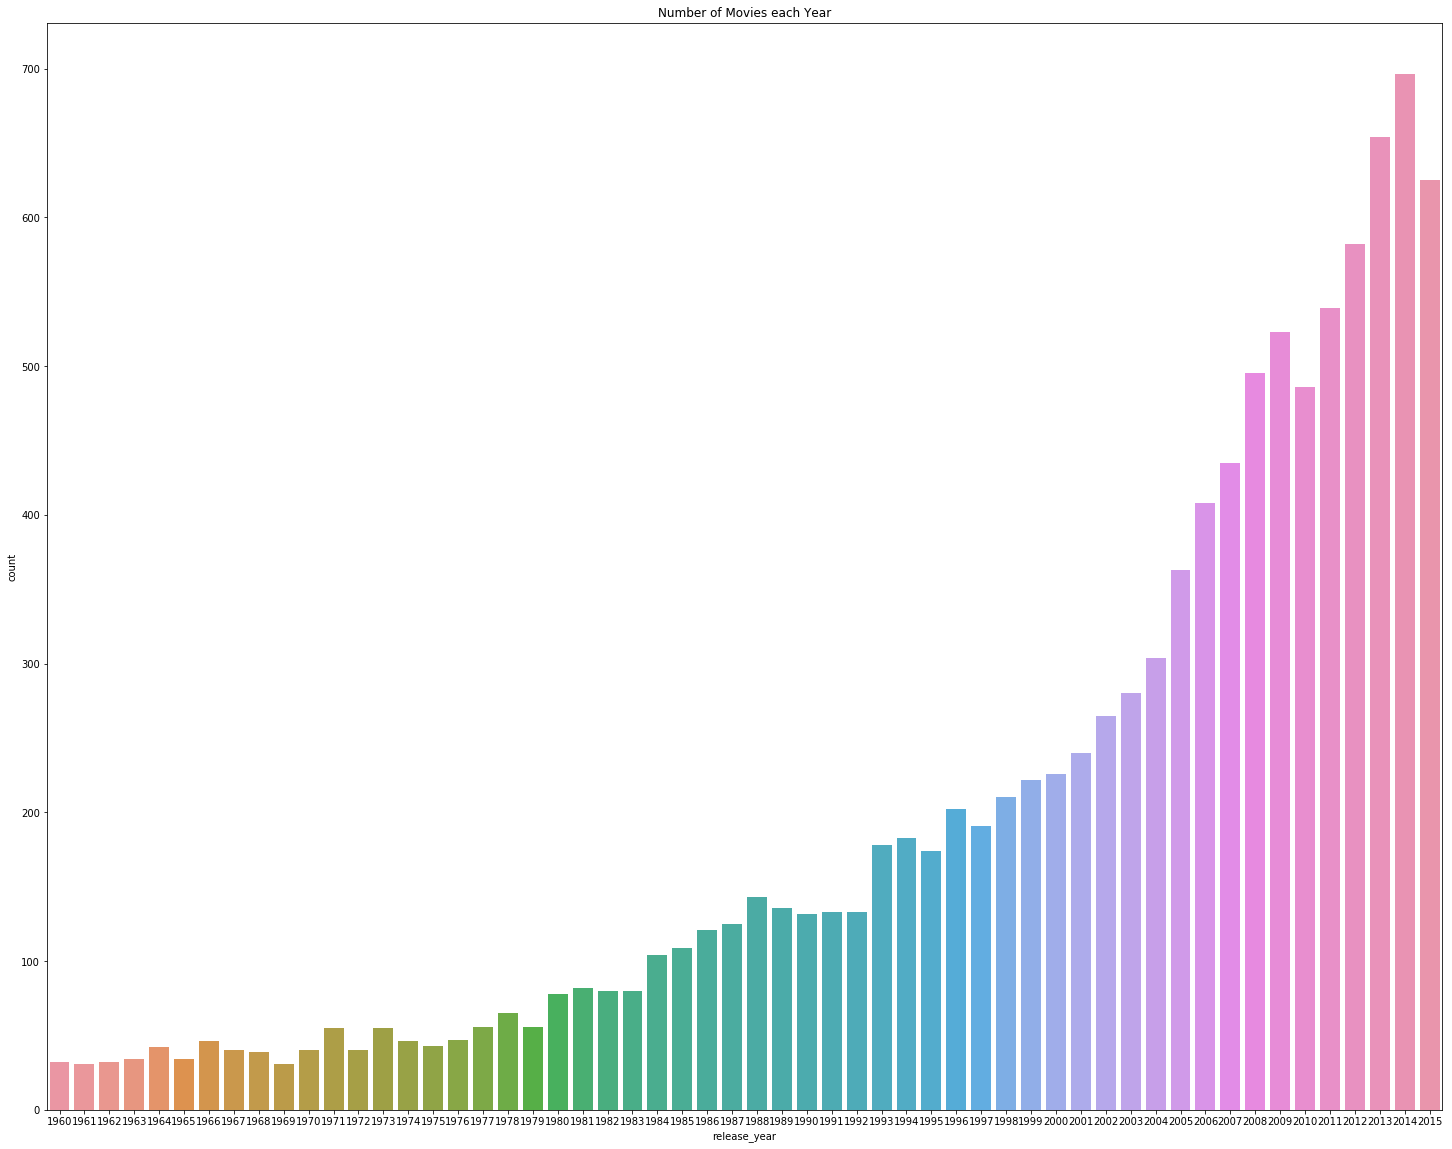

In [94]:
#Number of release in each year
plt.figure(figsize=(25,20))
sns.countplot(x='release_year',data=movies)
plt.title("Number of Movies each Year")
plt.show()

## **Which Genre Movie Has The Highest voting Average ?**  <br>
In this analysis i have used the *genre* and *vote_average* variables to determine which movie genre gets the highest voting average, and from the visualization it is clear that **Documentary** genre has the higest number of voting average followed by Music, Animation and Foregin movies.

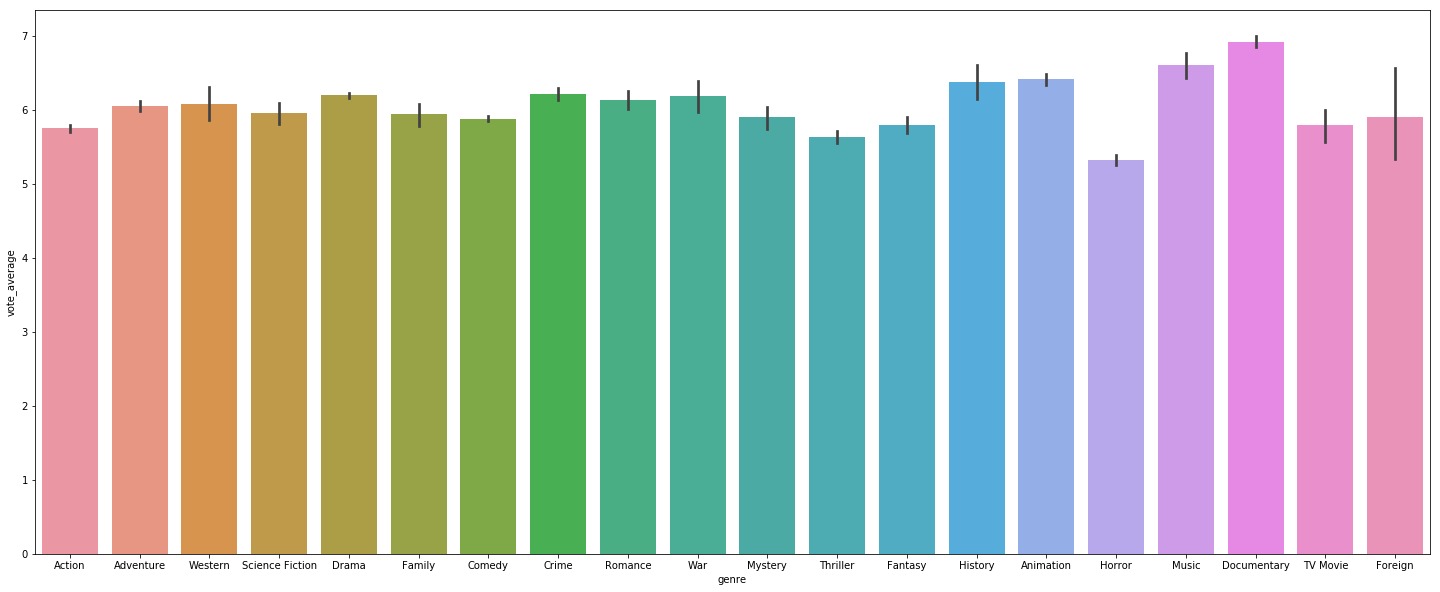

In [95]:
#comparision graph between the genre & vote_average
plt.figure(figsize = (25,10))
sns.barplot(x='genre',y='vote_average',data = movies)
plt.show()

## Which genre movies has the highest popularity amoung people? <br>
In this analysis i have used the genre and the popularity variable to determine the type of genre liked mostly by people, and from the visualization it is clear that **Adventure** movies has the highest populartiy with the rating of 12 which is followed by the science fiction moives with 11 rating and rest all fall's below 10.

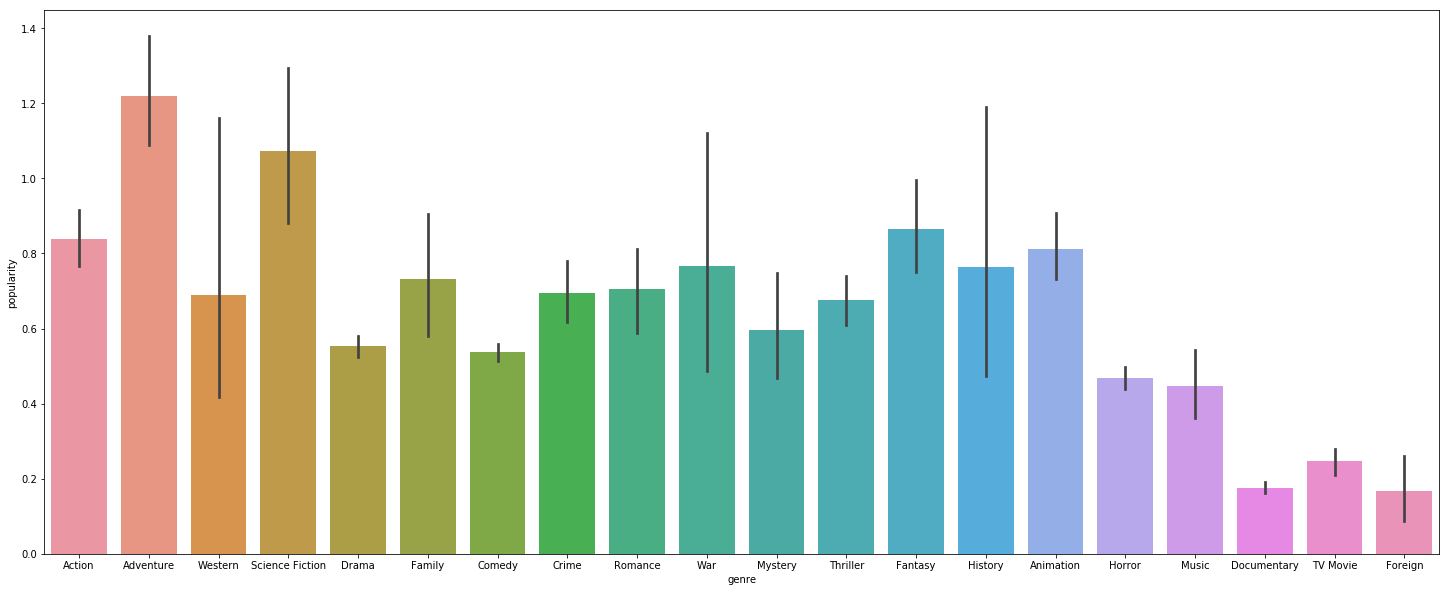

In [96]:
#comparision between the genre and popularity
plt.figure(figsize=(25,10))
sns.barplot(x='genre',y='popularity',data=movies)
plt.show()

## Which Movie Genre Has The Highest Investment? <br>
In this visualization i have used the *genre* and *budget_in_billion* variables for analysing the movie gener has given the higest investment all time. From the bar plot it is very clear that higest investment buget is for the **Adventure** Films.

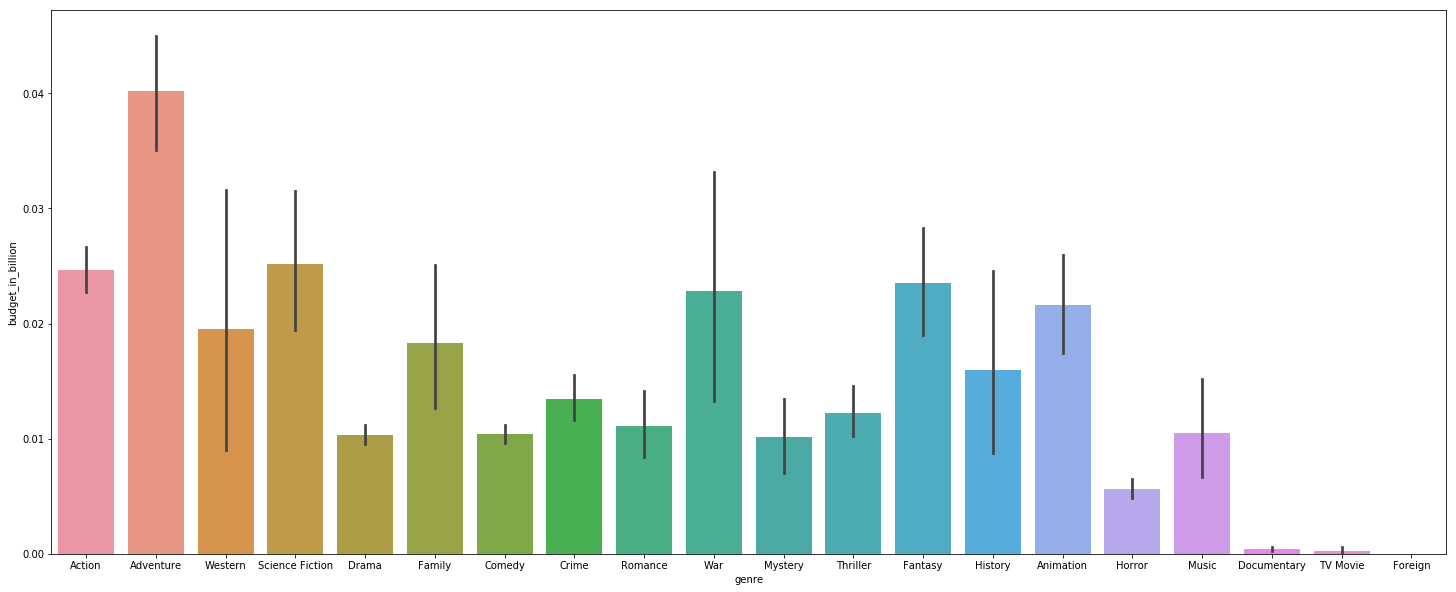

In [97]:
#comparision between different genres and their budget
plt.figure(figsize=(25,10))
sns.barplot(x='genre',y='budget_in_billion',data=movies)
plt.show()

## Which Movie Genre has yield the Highest Revenue ? <br>
In this visualization *genre* and *revenue_in_billion* variables are used for analysing the type of genre yields the highest revenue and from the analysis it is very Transparent that **Adventure** Moives get's the higest revenue in averge with 120 Million Doller.

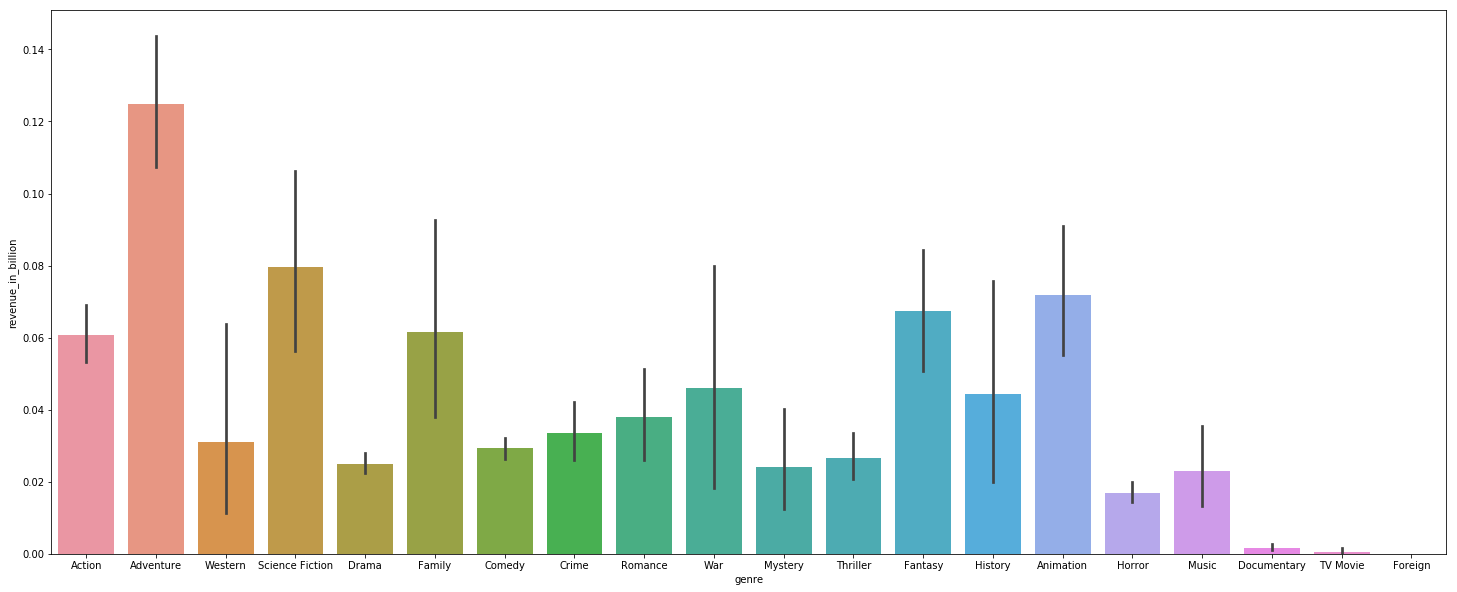

In [98]:
#comparision between the different genres and their revenue
plt.figure(figsize=(25,10))
sns.barplot(x='genre',y='revenue_in_billion',data=movies)
plt.show()

## Does the popularity of the movies depends on the runtime of the movie? <br>
For this analysis i have used the *runtime* and *popularity* variable to analyse whether the runtime of the movie affects the popularity of the movie and from the analysis it is very clear that the run time of the movie do affect the popularity and from the scatter plot it has a negetive correlation and movies with higest popularity has a runtime between **120 to 150 minutes** of runtime.


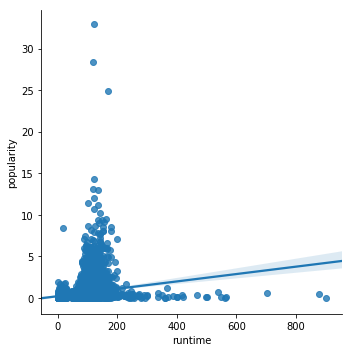

In [99]:
#scatter polt to analyse whether the popularity based on the movie runtime 
plt.figure(figsize=(20,10))
sns.lmplot(x='runtime',y='popularity',data= movies,fit_reg = True)
plt.show();

## Does the movie with higher budget yields high revenue? <br>
For this analysis the budget and the revenue variable have been used to analyse whether moives with the higher revenue depends on the budget of the movie. So, the scatter polt gives a negative correlation and yes the revenue of the movie mostly depends on the budget of the movie, but not always because there are some outliers in the plot where higher buget movie has yield less revenue but as it is a outlier we dont need to take much in to consideration, so the revenue of the movie depends on the budget of the movie.


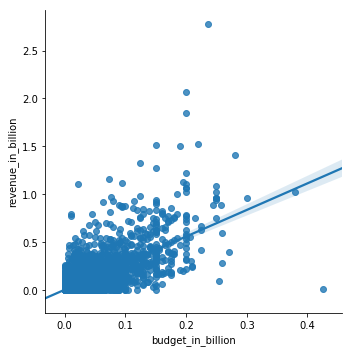

In [100]:
#scatter plot to analyse whether revenue of a movie based on the budget  
plt.figure(figsize=(20,10))
sns.lmplot(x='budget_in_billion',y='revenue_in_billion',data= movies,fit_reg=True)
plt.show();

In [101]:
#Dataframe on the mean popularity for each genre from highest to lowest
movies.groupby('genre',as_index=False)['popularity'].mean().sort_values('popularity',ascending = False)


,genre,popularity
1,Adventure,1.219548
15,Science Fiction,1.073693
8,Fantasy,0.866243
0,Action,0.838053
2,Animation,0.812961
18,War,0.767041
10,History,0.764636
7,Family,0.730987
14,Romance,0.704157
4,Crime,0.695163


In [102]:
#DataFrame on the mean voting avergare for each genre from highest to the lowest
movies.groupby('genre',as_index=False)['vote_average'].mean().sort_values('vote_average',ascending = False)


,genre,vote_average
5,Documentary,6.924766
12,Music,6.605000
2,Animation,6.416000
10,History,6.381818
4,Crime,6.215040
6,Drama,6.199673
18,War,6.183051
14,Romance,6.133871
19,Western,6.080952
1,Adventure,6.051966


In [103]:
#List of all unique Genre of movies
unique_genres = movies['genres'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))
individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

## Which Gener Movies released the most ? <br>
For this analysis i have used the each genre type in to seperate data frame to calcuate the total numbe of movies in each genre and from that analysis it is clear that **Drama** genre movie has been released the most with 4647 movies. <br>
## Which Year has Most Number of Movies Release for each Genre? <br>
Thriller : 2014 , TV Movies: 2015, Fantasy: 2009, Documentary: 2014, Action: 2014, Crime: 2013, Western: 1970&1994
Romance: 2010, War: 2014, Family: 2011, Foregin: 2013, Drama: 2014, Adventure: 2009, Horror: 2015, Comedy : 2009,
Animation: 2010, Music: 2015, History: 2008, Mystery: 2009, Science Fiction: 2015.

Number of movies in each genre 

Thriller 2898
TV Movie 167
Fantasy 914
Documentary 515
Action 2375
Crime 1351
Western 165
Romance 1704
War 268
Family 1226
Foreign 187
Drama 4745
Adventure 1465
Horror 1629
Comedy 3778
Animation 696
Music 407
History 332
Mystery 809
Science Fiction 1222


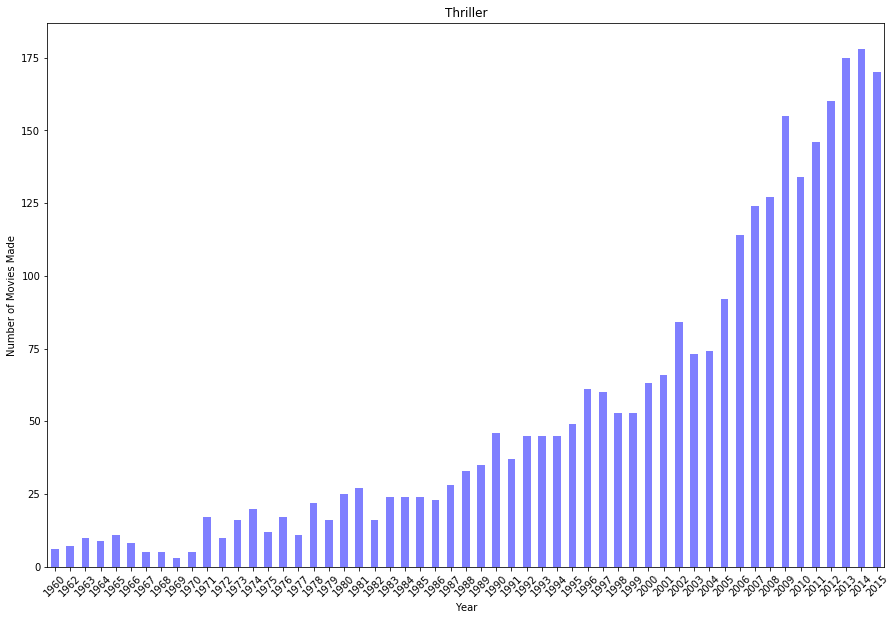

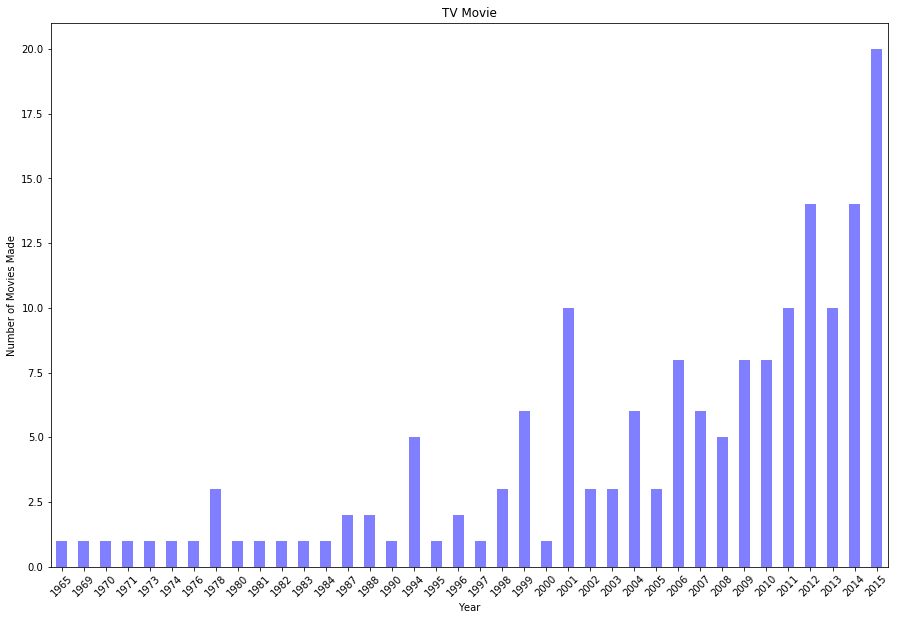

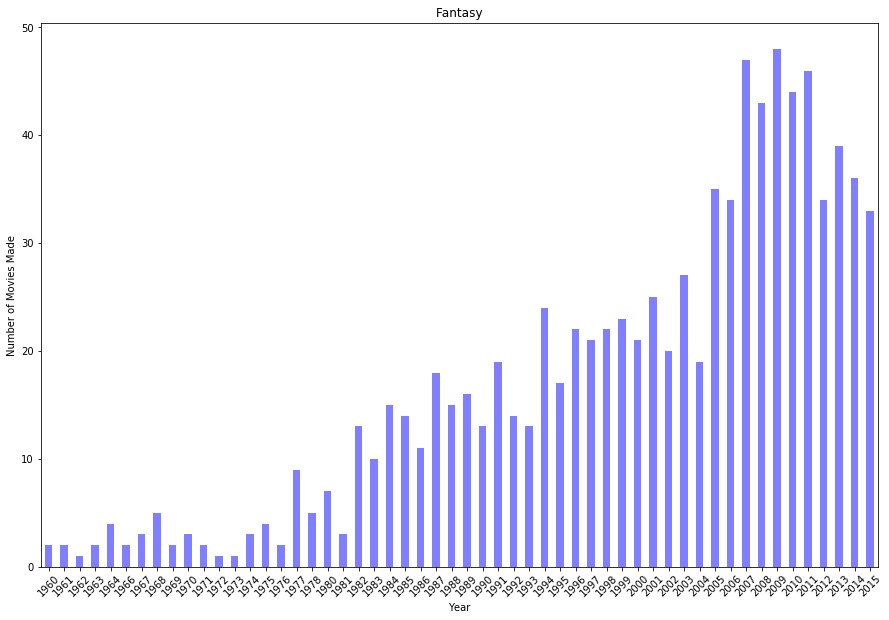

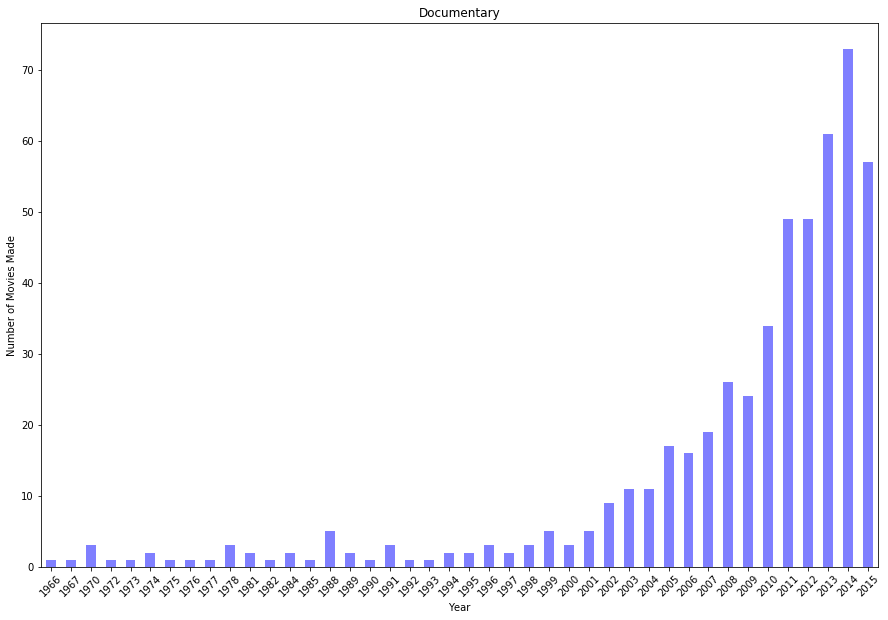

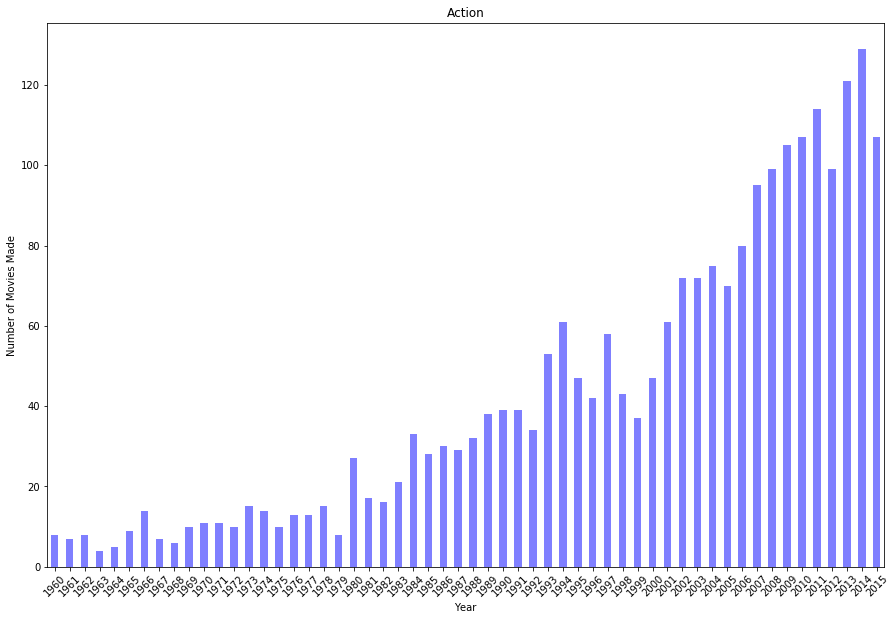

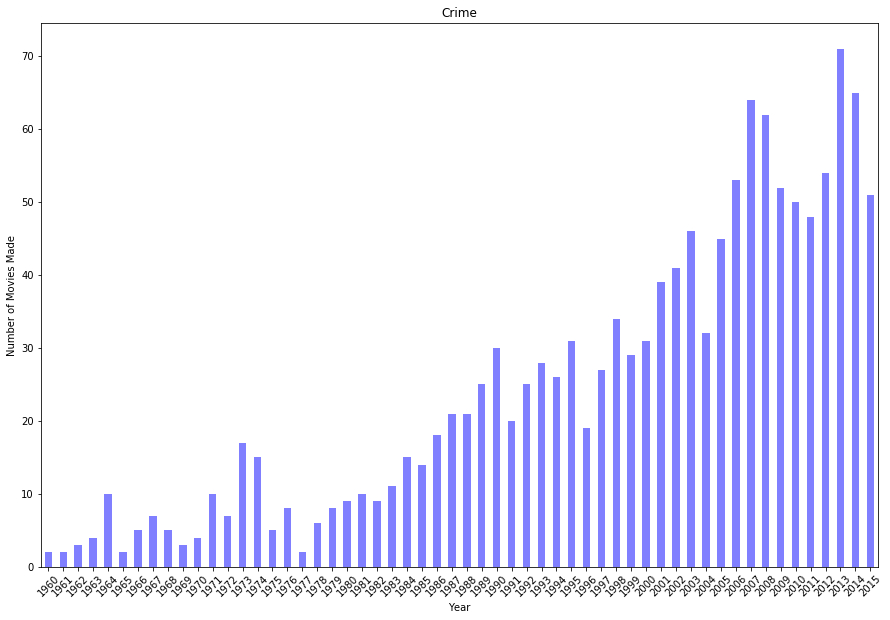

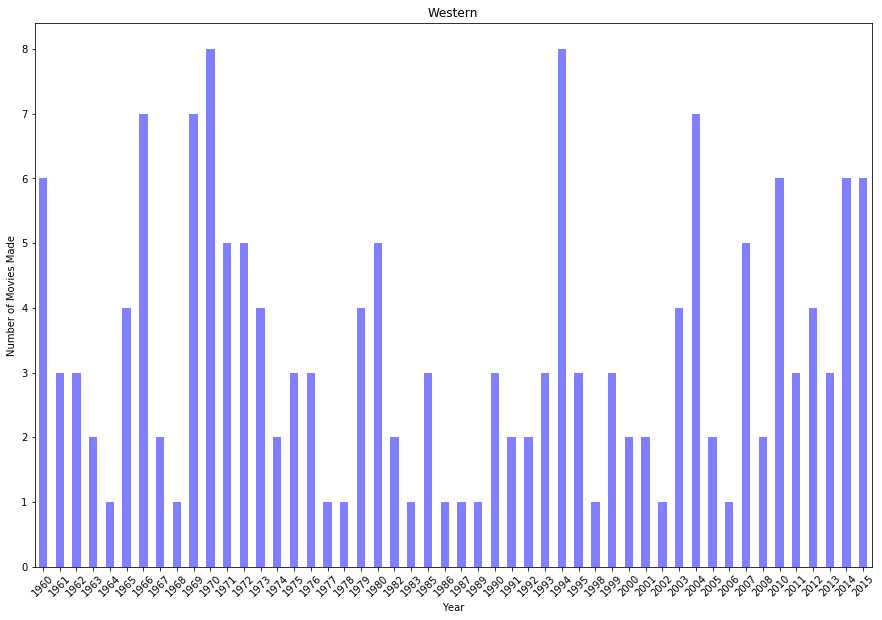

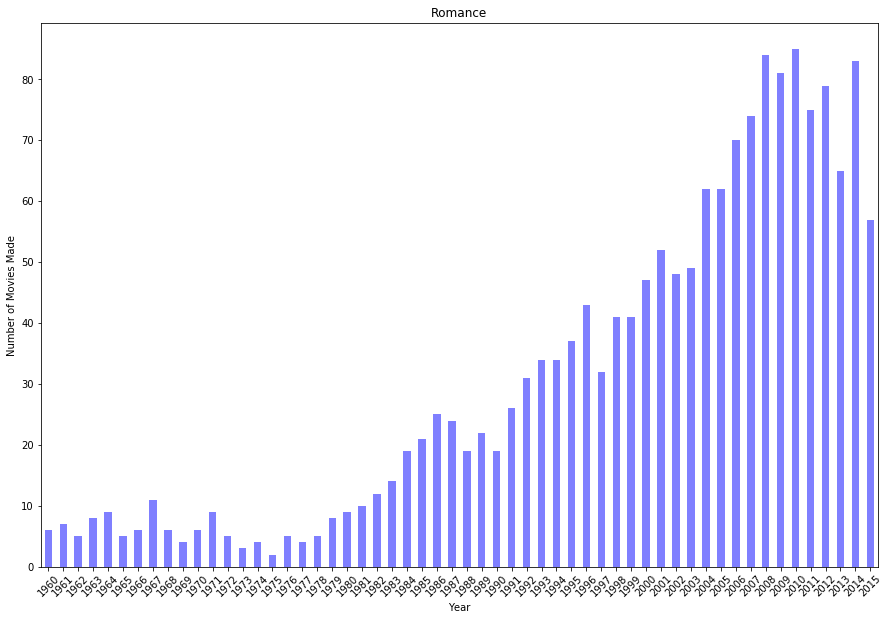

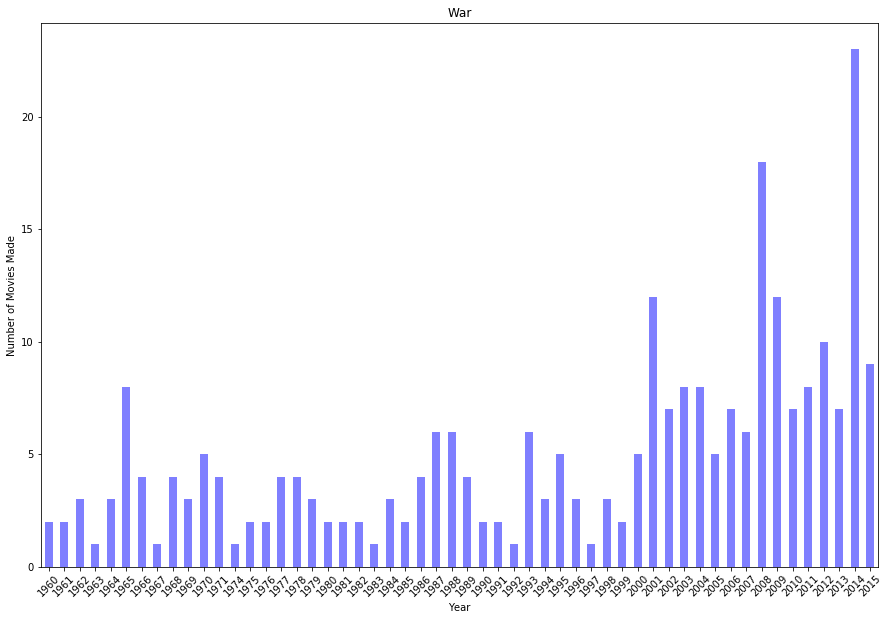

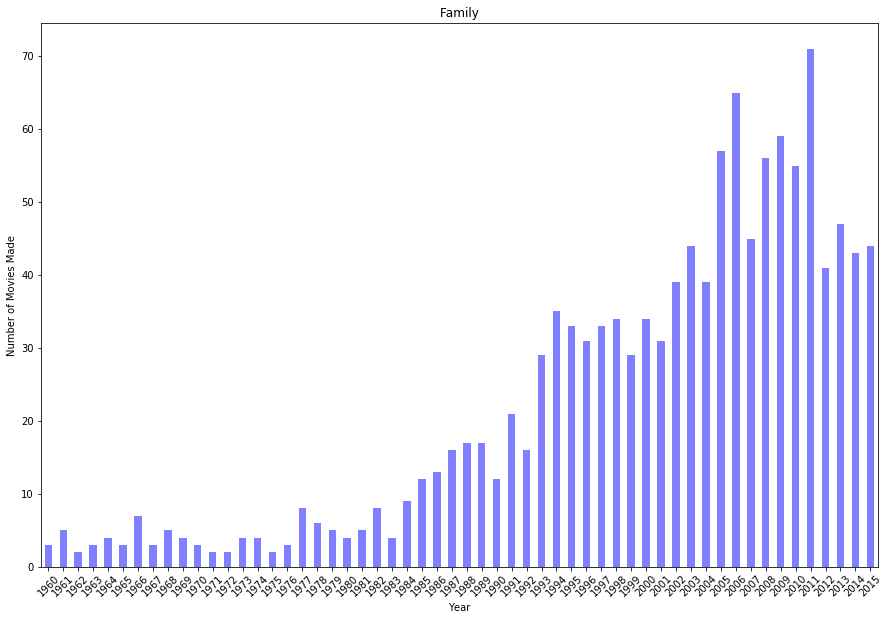

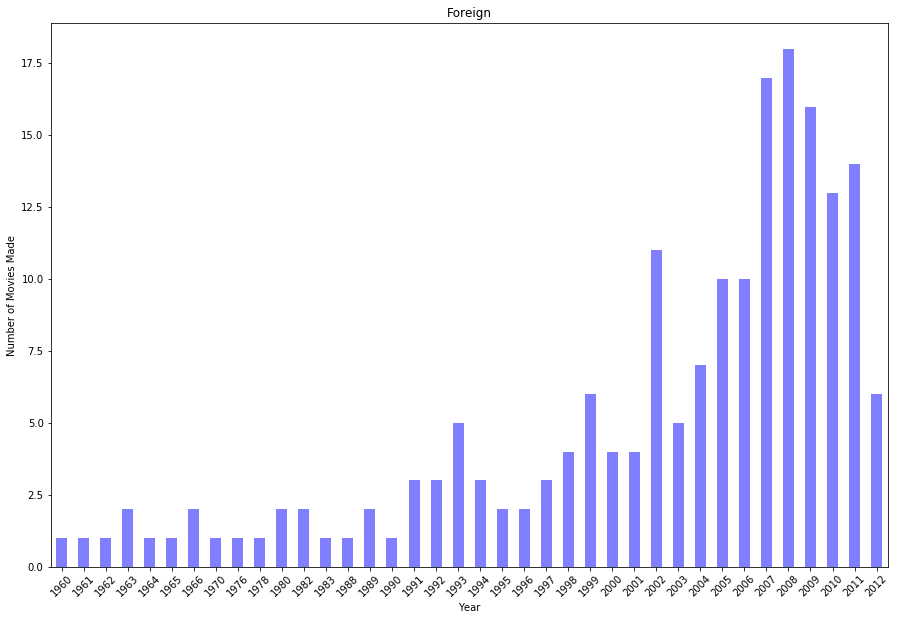

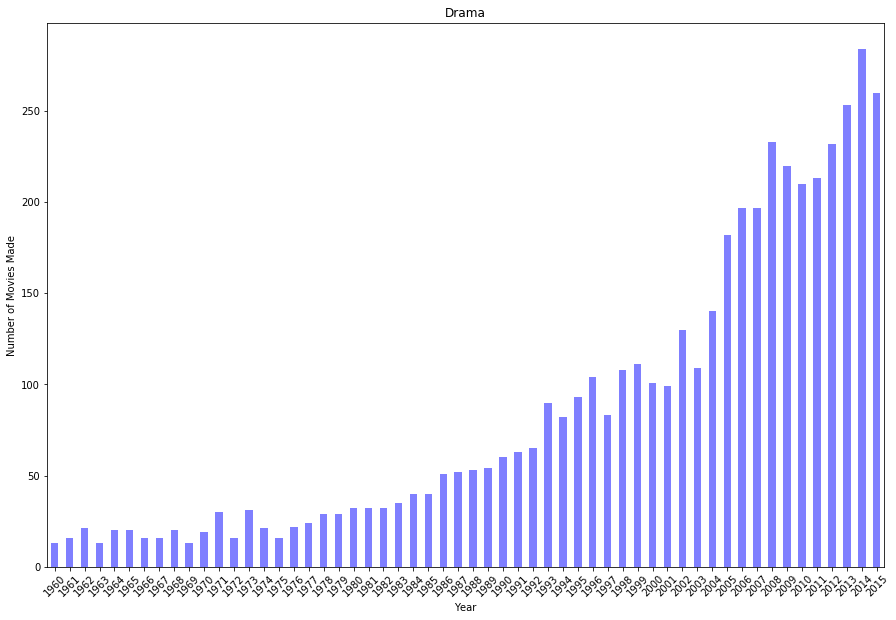

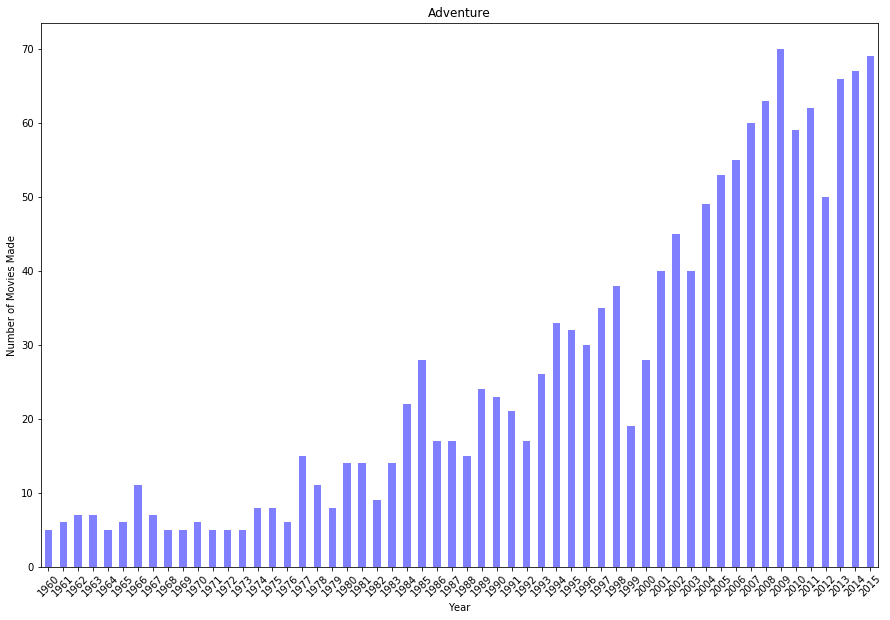

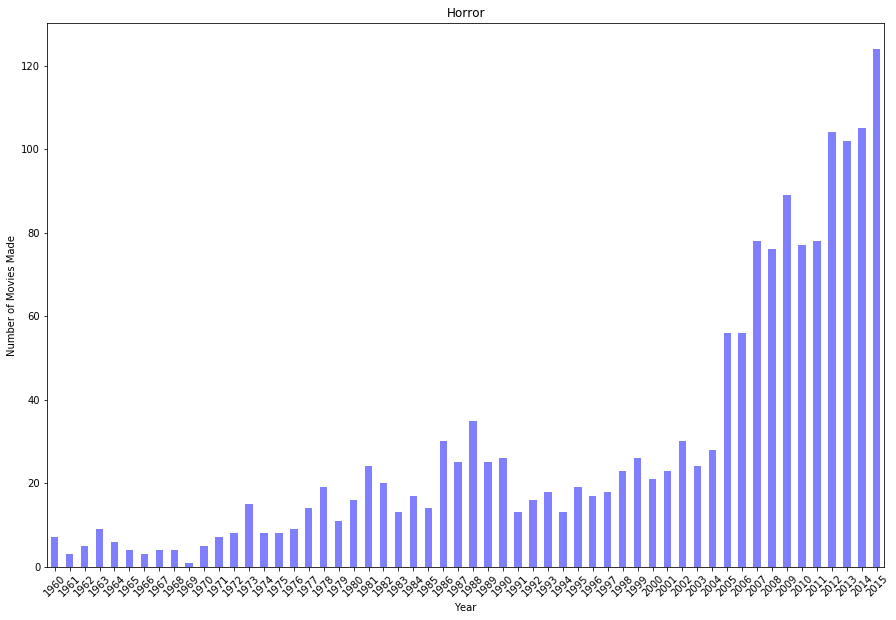

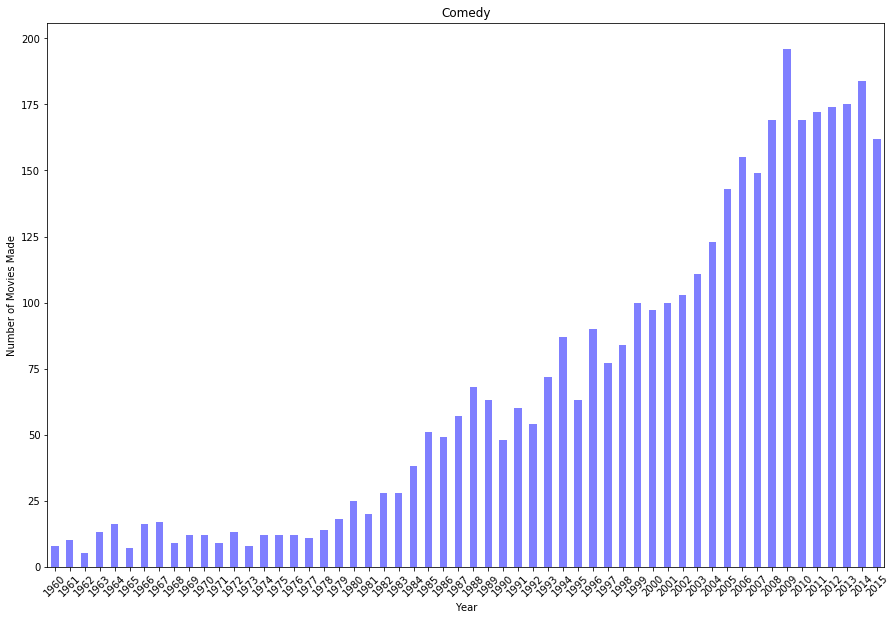

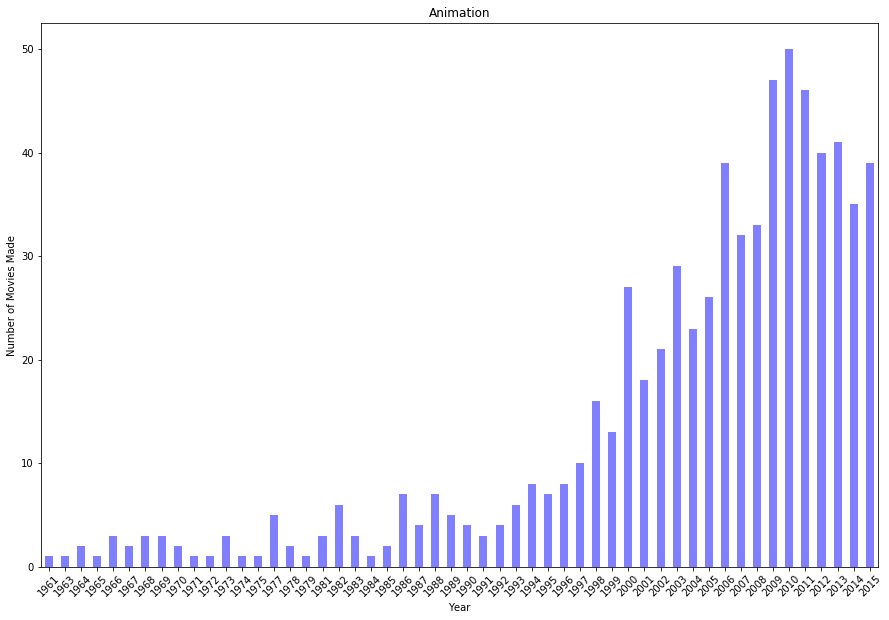

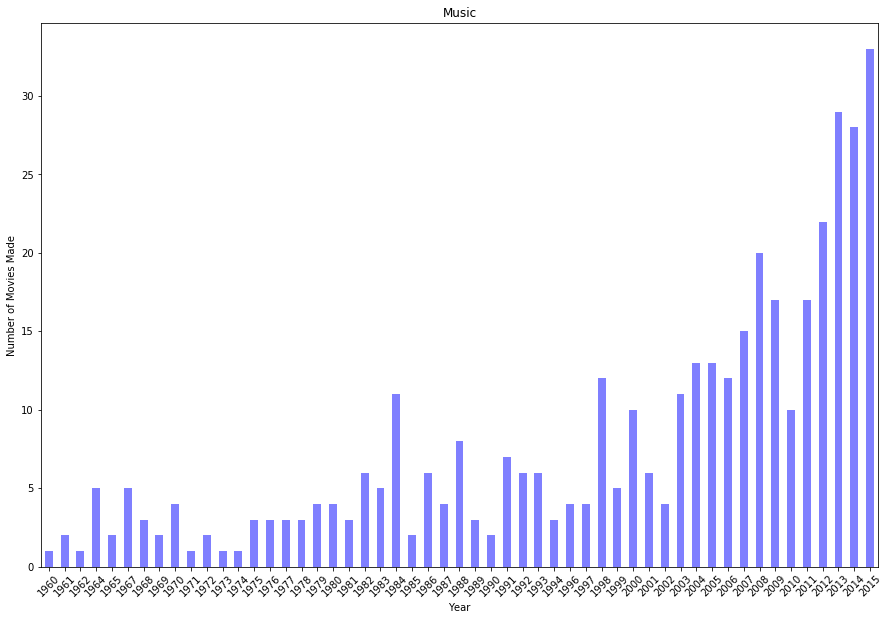

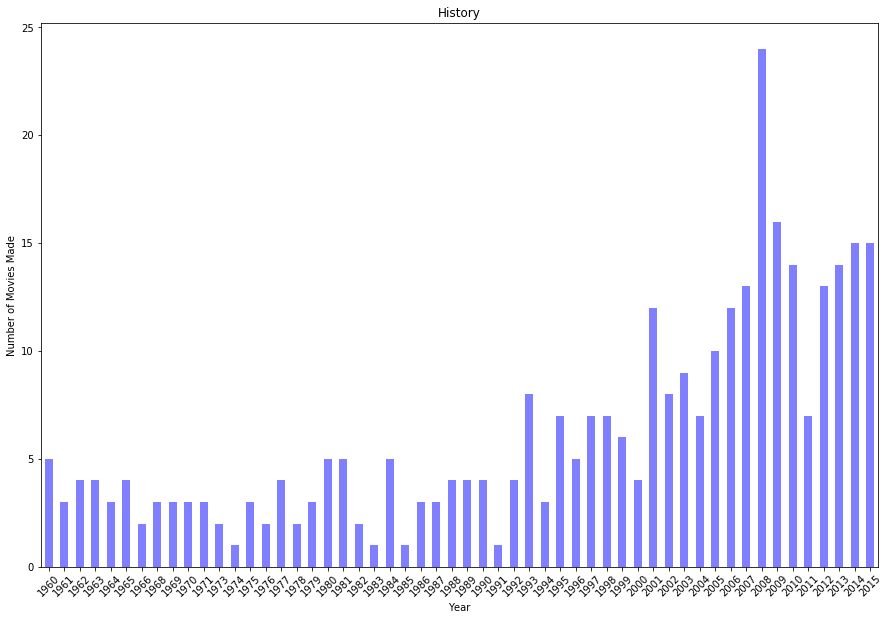

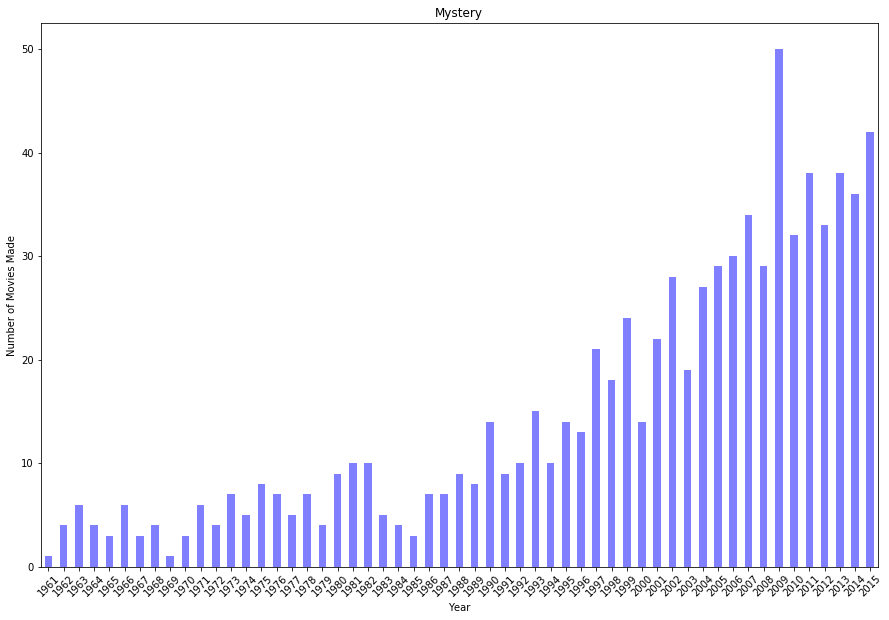

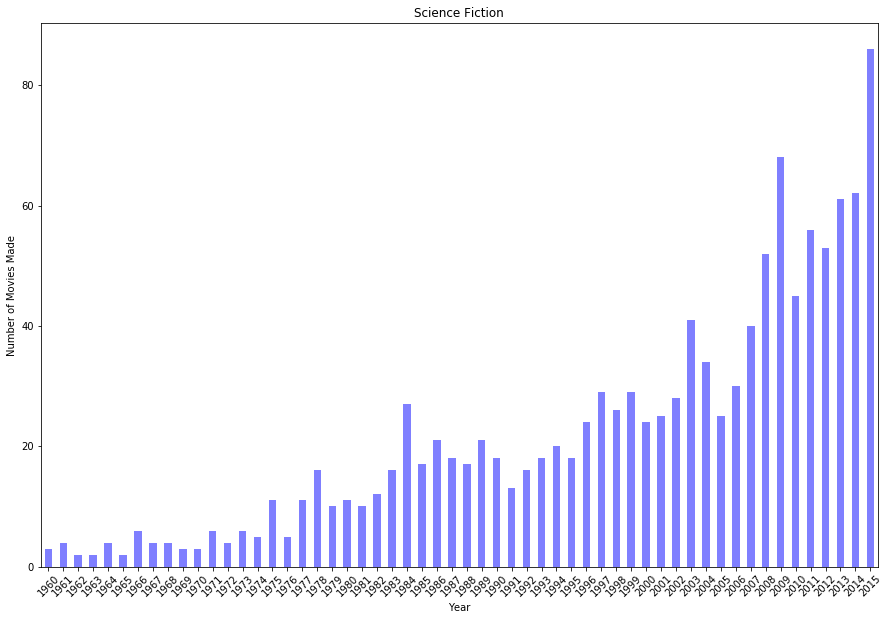

In [104]:
#Total number of movies on each genre
#A detailed analysis on total movie release in each year for each genre
print ( "Number of movies in each genre \n")
for genre in individual_genres:
    seperate_genre = movies['genres'].str.contains(genre).fillna(False)
    plt.figure(figsize=(15,10))
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    movies[seperate_genre].release_year.value_counts().sort_index().plot(kind='bar',color ='b',alpha=0.5,rot=45)
    print(genre, len(movies[seperate_genre]))

### **Calcuated the Percentage of movies released in each genre ** 

In [105]:
# calcuating Percentage of movies released on each genre
genre_percent = np.zeros(len(individual_genres))
i =0
for genre in individual_genres:
    current_genre = movies['genres'].str.contains(genre).fillna(False)
    percent = len(movies[current_genre])/10842 * 100
    genre_percent[i] = percent
    i += 1
    print (genre, percent)

Thriller 26.72938572219148
TV Movie 1.5403062165652093
Fantasy 8.430178933776055
Documentary 4.750046116952592
Action 21.90555248109205
Crime 12.460800590296992
Western 1.5218594355285002
Romance 15.71665744327615
War 2.4718686589190186
Family 11.307876775502674
Foreign 1.7247740269323002
Drama 43.76498800959233
Adventure 13.512267109389411
Horror 15.024903154399558
Comedy 34.845969378343476
Animation 6.419479800774765
Music 3.753919940970301
History 3.0621656520937095
Mystery 7.461722929348828
Science Fiction 11.270983213429256


In [106]:
#DataFrame for clear visualization and to make Analysis on them
genre_df = pd.DataFrame(genre_percent,index = individual_genres,columns=['percentage'])
genre_df['percentage'] = genre_df['percentage'].round(2)
genre_df 

,percentage
Thriller,26.73
TV Movie,1.54
Fantasy,8.43
Documentary,4.75
Action,21.91
Crime,12.46
Western,1.52
Romance,15.72
War,2.47
Family,11.31


## Top five Genre of movies contribution <br>
Here for this analysis i have calcuated the movies contribution percentage on each genre from the previous cell and from that i have plotted the top 5 genres contribution in a pie chart for a better visualiation in percentage among the top 5 and from that the most contribution of movies is by the **Drama** and **Comedy** where they differ only by 5.7 percent.


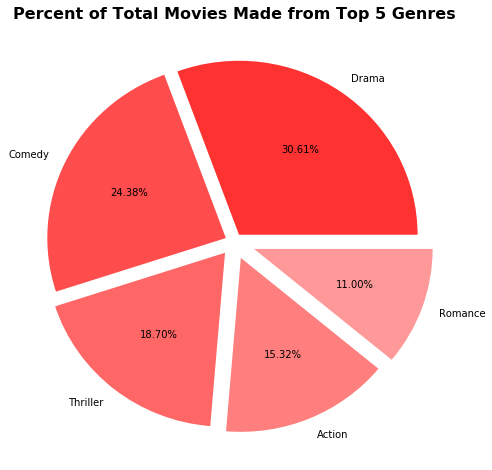

In [107]:
#Pie chart analysis on the top 5 genres based on the total number of movies
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999' ]
genre_df.sort_values(by='percentage', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode, colors=colors)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

### **Calcuated the Revenue obtained by each Genre of movie in percentage ** 

In [108]:
#Total Revenue obtained by each genre
genre_revenue_percent = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['genres'].str.contains(genre).fillna(False)
    revenue_percent = movies[current_genre].revenue_in_billion.sum()/movies['revenue_in_billion'].sum() * 100
    genre_revenue_percent[i] = revenue_percent
    i += 1
    print (genre,revenue_percent)

Thriller 28.04589135255545
TV Movie 0.009740018211932247
Fantasy 20.45814612556723
Documentary 0.21850702683595125
Action 40.119461115628624
Crime 13.231441770798769
Western 1.0931632985657296
Romance 14.12283051953406
War 2.9652379661960144
Family 20.649511901041976
Foreign 0.06628927664467053
Drama 32.046780565273274
Adventure 38.51467192109378
Horror 6.378150419067804
Comedy 32.92922157601089
Animation 12.192833111528124
Music 2.7033841747348375
History 2.4639840331114122
Mystery 7.518547935720401
Science Fiction 19.93106957957271


In [109]:
#Same as before made a DataFrame for clear visualization and to make Analysis on them
genre_revenue_df = pd.DataFrame(genre_revenue_percent, index = individual_genres,columns=['percentage'])
genre_revenue_df 

,percentage
Thriller,28.045891
TV Movie,0.009740
Fantasy,20.458146
Documentary,0.218507
Action,40.119461
Crime,13.231442
Western,1.093163
Romance,14.122831
War,2.965238
Family,20.649512


## Total Percentage Revenue Obtained by Top 5 Genres <br>
I have calcuated the percentage of Revenue obtained by individual genres in the previous cell and from that i have plotted the pie chart for the top 5 genres for a better visualiation to compare their contribution to a extent and from that analysis Action, Adventure and Comedy are nearby each other in their contribution and amoung these Action movies yields the most revenue. 

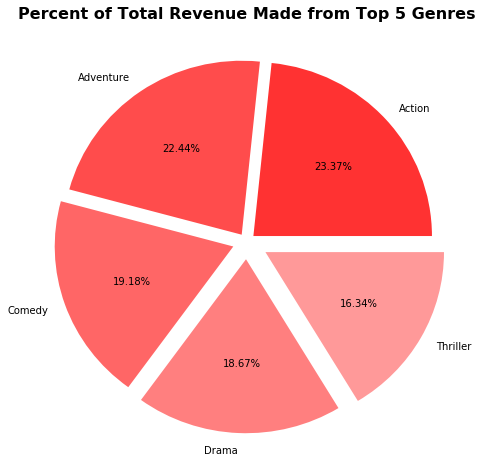

In [110]:
#Pie chart analysis on the top 5 genres based on the revenue
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999' ]
genre_revenue_df.sort_values(by='percentage',ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Percent of Total Revenue Made from Top 5 Genres', weight='bold', fontsize=16)

### **Sorted out the top 10 Directors based on their movie count and have calculated the total revenue obtained from them.** 

In [111]:
# Obtaining the first 10 directors based on the numbe of movies directed
most_active_director = movies.director.value_counts().head(10)
most_active_directors = most_active_director.index


In [112]:
# Obtaining the Revenues given by these top 10 directors in Billions
director_revenue_total = np.zeros(len(most_active_directors))
i =0 
for dirct in most_active_directors:
    current_director = movies['director'].str.contains(dirct).fillna(False)
    director_revenue = movies[current_director].revenue_in_billion.sum()
    director_revenue_total[i] = director_revenue
    i += 1
    print (dirct,director_revenue)

Woody Allen 0.8520244779999999
Clint Eastwood 2.8248712549999997
Martin Scorsese 1.9672453189999994
Steven Spielberg 9.048014690999999
Ridley Scott 3.6499964800000013
Ron Howard 3.484471847
Steven Soderbergh 2.1593816660000003
Joel Schumacher 1.525356531
Brian De Palma 1.0251171700000001
Tim Burton 3.782609685


In [113]:
#DataFrame for the clear Visualization and Analysis
dirct_revenue_df = pd.DataFrame(director_revenue_total,index = most_active_directors,columns=['Revenue'])
dirct_revenue_df

,Revenue
Woody Allen,0.852024
Clint Eastwood,2.824871
Martin Scorsese,1.967245
Steven Spielberg,9.048015
Ridley Scott,3.649996
Ron Howard,3.484472
Steven Soderbergh,2.159382
Joel Schumacher,1.525357
Brian De Palma,1.025117
Tim Burton,3.782610


## Top 10 Directors who has made Highest Revenue Percentage overall <br>
In this analysis i have calcuated the percentage of revenue contribution of individual directors in the above cell, and for a better analysis i have sorted out the top 10 directors among them and plotted a pie chart to get a better visualization, from the visualization it is very much outstanding that **Steven Spielberg** has made the higest contribution with 29.84% and followed by **Tim Burton** with 12.48%.


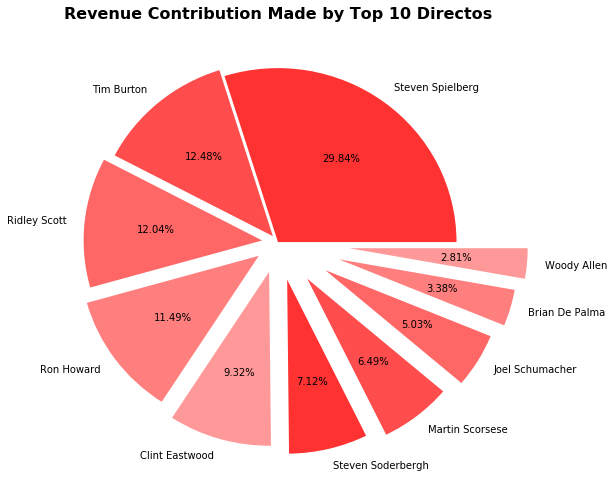

In [114]:
#pie chart analysis on the directors with highest to the lowest
explode = np.linspace(0,0.4, 10)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999' ]
dirct_revenue_df.sort_values(by='Revenue',ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Revenue Contribution Made by Top 10 Directos', weight='bold', fontsize=16)

### **Sorted out the top 10 Actors based on their movie count and have calculated the total revenue obtained from them.** 

In [115]:
# creating a index of top 10 lead_role who has done most films
most_active_hero = movies['lead_role'].value_counts().sort_values(ascending=False).head(10)
most_active_heros = most_active_hero.index

In [116]:
# calcuating the revenue made by the top the lead roles
hero_total_revenue = np.zeros(len(most_active_heros))
i = 0 
for hero in most_active_heros:
    current_hero = movies['lead_role'].str.contains(hero).fillna(False)
    revenue_hero = movies[current_hero].revenue_in_billion.sum()
    hero_total_revenue[i] = revenue_hero 
    i += 1
    print (hero,revenue_hero)    

Nicolas Cage 3.6068694389999996
Robert De Niro 2.475179038
Bruce Willis 5.002108683
Clint Eastwood 1.698807639
Johnny Depp 6.418930301000001
Tom Hanks 7.774265766000002
Sylvester Stallone 3.878945348
Jean-Claude Van Damme 0.569362549
Steven Seagal 0.5578430129999999
John Travolta 2.8363024240000003


In [117]:
# Creating DataFrame for a clear view and analysis 
hero_revenue_df = pd.DataFrame(hero_total_revenue, index = most_active_heros, columns=['Revenue'])
hero_revenue_df

,Revenue
Nicolas Cage,3.606869
Robert De Niro,2.475179
Bruce Willis,5.002109
Clint Eastwood,1.698808
Johnny Depp,6.418930
Tom Hanks,7.774266
Sylvester Stallone,3.878945
Jean-Claude Van Damme,0.569363
Steven Seagal,0.557843
John Travolta,2.836302


## Top 10 Actors who has made Highest Revenue Overall <br>
Calcuation for the percentage of revenue contribution of top 10 actors have been made on above cell, for a better visualization i have made a pie chart analysis of the top 10 actors from that visualization **Tom Hank** and **Johnny Depp** has made the highest revenue percentage with 22.33% and 18.44%.

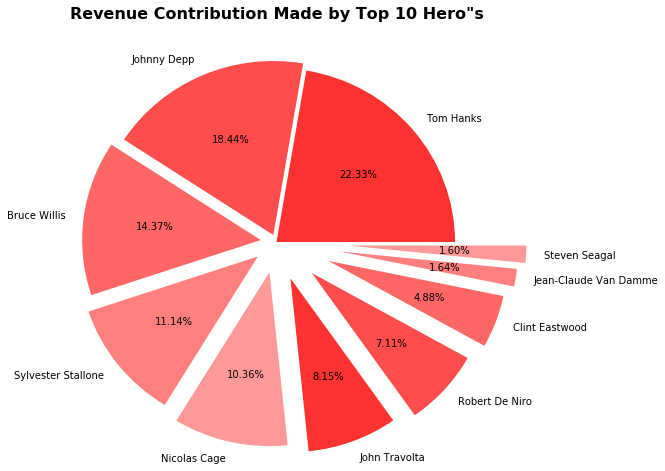

In [118]:
#pie chart analysis on the heros contribution in revenue from highest to the lowest
explode = np.linspace(0,0.4, 10)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999' ]
hero_revenue_df.sort_values(by='Revenue',ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Revenue Contribution Made by Top 10 Hero"s', weight='bold', fontsize=16)

## Finialized Conclusion on the Analysis

### From all the analysis made on the Movies and their Genre , conclusion hits on two basics for movie Making,

* **Business Prespective**
* **Awards Prespective**

* **Business Prespective:**
  -  Based on the Business Prespective, movies can gain more revenues based on the follwing Charateristics
    - Budget
    - Genre
    - Lead Role (said to be as hero)
    - Runtime <br>
    So from the given data basd on the business prespective movies with high budget, genre like Adventure,science Fiction,Action and Fantasy, based on the lead role and the run time a movie can make a great business in return for the investment. <br>
* **Awards Prespective:**
  - Awards Prespective movis have the following charateristics 
   - Genre 
   - Runtime 
   - Budget <br>
   So from the award Prespective movies mostly depends on the genres like documentary, History, Animation, Fantasy and Music because they have the higest voting average, then comes the runtime of the movie which should not drag, at last comes the budget, where awards to a movie can only from the voting rate and these voting rate solely depends on the genre of movie.
   


# Limitations 

* Datasets had some missing values which was replaced it will zeros for numerical values and in some had missing values on the movie_title and genre those rows have been removed since those cannot contribute to the analysis.
* Dataset had some limitation on making the Exploration and Statistical analysis, where it could have been better with some more variables mentioning which **season movie was released**,  **movie promotion budget**, and now a days social handling gives more hype for a movie, so there could have been **number of social media post and handling for a moive** 
 - These variables could have given more insights on the data to come with a prediction of answering better for the questions based on,
  - popularity
  - Revenue
  - Rating
* Final, limitation which i could say is, this is a single dataset which gives movies rating and votings from the IMDB movies alone, so this is constrained only from the IMDB user's review and rating but not the entire people who watched the film, so these analysis can predict only to an extend but not entirely. 